<a href="https://colab.research.google.com/github/Yuthish27/DV-AirFly-Insights-Yuthish/blob/main/Yuthish_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ======================================================================
# 📦 Kaggle API Setup & Dataset Download
# ======================================================================
# In this section, we:
# 1. Install and configure the Kaggle API inside Google Colab.
# 2. Upload our Kaggle API key (kaggle.json) for authentication.
# 3. Create the required `.kaggle` folder and set proper permissions.
# 4. Use Kaggle API commands to download the "Airline Delay Causes" dataset.
# 5. Unzip the dataset into the `/content/data` directory for further use.
#
# ⚠️ Note:
# - This setup is only required the first time you run the notebook in Colab.
# - After this step, you will have the raw dataset ready for preprocessing & EDA.
# ======================================================================


In [9]:
#install Kaggle
!pip install -q kaggle

In [10]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [11]:
#create a kaggle folder
!mkdir ~/.kaggle

In [12]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [13]:
#Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [14]:
# to list all datasets in kaggle
! kaggle datasets list

ref                                                          title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
yashdevladdha/uber-ride-analytics-dashboard                  Uber Data Analytics Dashboard                         17324552  2025-08-08 11:13:42.920000          31989        735  1.0              
mdsultanulislamovi/student-stress-monitoring-datasets        Student Stress Monitoring Datasets                       24336  2025-07-24 16:30:01.617000          17844        309  1.0              
navjotkaushal/coffee-sales-dataset                           Coffee Sales Dataset                                     38970  2025-08-19 09:37:30.057000           3973         53  0.8235294        
pratyushpuri/mu

In [15]:
!mkdir -p /content/data

In [16]:
!kaggle datasets download -d giovamata/airlinedelaycauses -p /content/data

Dataset URL: https://www.kaggle.com/datasets/giovamata/airlinedelaycauses
License(s): unknown
  0% 0.00/66.6M [00:00<?, ?B/s]
100% 66.6M/66.6M [00:00<00:00, 883MB/s]


In [17]:
!unzip -q "/content/data/*.zip" -d /content/data

In [18]:
import os, glob
files = glob.glob("/content/data/**/*", recursive=True)
files

['/content/data/st99_d00.shp',
 '/content/data/DelayedFlights.csv',
 '/content/data/st99_d00.shx',
 '/content/data/st99_d00.dbf',
 '/content/data/airlinedelaycauses.zip']

In [ ]:
# MILESTONE 1
# -----------------------
# Week 1: Initialization & Dataset Setup
# -----------------------

In [19]:

import pandas as pd
import numpy as np
import os

In [20]:
import pandas as pd, glob

csvs = glob.glob("/content/data/**/*.csv", recursive=True)
csvs  # inspect the list; if more than one, pick the one you need

csv_path = csvs[0]  # or set explicitly, e.g., "/content/data/airline_delay_causes.csv"
df = pd.read_csv(csv_path, low_memory=False)
df.shape, df.head(3)


((1936758, 30),
    Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
 0           0  2008      1           3          4   2003.0        1955   
 1           1  2008      1           3          4    754.0         735   
 2           2  2008      1           3          4    628.0         620   
 
    ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
 0   2211.0        2225            WN  ...     4.0     8.0          0   
 1   1002.0        1000            WN  ...     5.0    10.0          0   
 2    804.0         750            WN  ...     3.0    17.0          0   
 
    CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
 0                 N         0           NaN           NaN      NaN   
 1                 N         0           NaN           NaN      NaN   
 2                 N         0           NaN           NaN      NaN   
 
   SecurityDelay  LateAircraftDelay  
 0           NaN                NaN  
 1           NaN          

In [ ]:
# 1. Explore schema
print("Shape (rows, cols):", df.shape)
print("\nData types & nulls:")
df.info()

Shape (rows, cols): (1936758, 30)

Data types & nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 


In [ ]:

# 2. Summary stats
df.describe(include='all').T.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1936758.0,NaN,NaN,NaN,3341651.151336,2066064.95752,0.0,1517452.5,3242558.0,4972466.75,7009727.0
Year,1936758.0,NaN,NaN,NaN,2008.0,0.0,2008.0,2008.0,2008.0,2008.0,2008.0
Month,1936758.0,NaN,NaN,NaN,6.111106,3.482546,1.0,3.0,6.0,9.0,12.0
DayofMonth,1936758.0,NaN,NaN,NaN,15.75347,8.776272,1.0,8.0,16.0,23.0,31.0
DayOfWeek,1936758.0,NaN,NaN,NaN,3.984827,1.995966,1.0,2.0,4.0,6.0,7.0
DepTime,1936758.0,NaN,NaN,NaN,1518.534117,450.485255,1.0,1203.0,1545.0,1900.0,2400.0
CRSDepTime,1936758.0,NaN,NaN,NaN,1467.472644,424.7668,0.0,1135.0,1510.0,1815.0,2359.0
ArrTime,1929648.0,NaN,NaN,NaN,1610.140629,548.178143,1.0,1316.0,1715.0,2030.0,2400.0
CRSArrTime,1936758.0,NaN,NaN,NaN,1634.224641,464.634712,0.0,1325.0,1705.0,2014.0,2400.0
UniqueCarrier,1936758,20,WN,377602,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

# 2. Summary stats
df.describe(include='all').T.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1936758.0,NaN,NaN,NaN,3341651.151336,2066064.95752,0.0,1517452.5,3242558.0,4972466.75,7009727.0
Year,1936758.0,NaN,NaN,NaN,2008.0,0.0,2008.0,2008.0,2008.0,2008.0,2008.0
Month,1936758.0,NaN,NaN,NaN,6.111106,3.482546,1.0,3.0,6.0,9.0,12.0
DayofMonth,1936758.0,NaN,NaN,NaN,15.75347,8.776272,1.0,8.0,16.0,23.0,31.0
DayOfWeek,1936758.0,NaN,NaN,NaN,3.984827,1.995966,1.0,2.0,4.0,6.0,7.0
DepTime,1936758.0,NaN,NaN,NaN,1518.534117,450.485255,1.0,1203.0,1545.0,1900.0,2400.0
CRSDepTime,1936758.0,NaN,NaN,NaN,1467.472644,424.7668,0.0,1135.0,1510.0,1815.0,2359.0
ArrTime,1929648.0,NaN,NaN,NaN,1610.140629,548.178143,1.0,1316.0,1715.0,2030.0,2400.0
CRSArrTime,1936758.0,NaN,NaN,NaN,1634.224641,464.634712,0.0,1325.0,1705.0,2014.0,2400.0
UniqueCarrier,1936758,20,WN,377602,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_sample = df.sample(frac=0.05, random_state=42)  # 5% sample
print("Sample shape:", df_sample.shape)

Sample shape: (96838, 30)


In [ ]:
# 5. Memory usage before optimization
mem_before = df.memory_usage(deep=True).sum() / 1024**2
print(f"Memory used before optimization: {mem_before:.2f} MB")

Memory used before optimization: 849.63 MB


In [ ]:
# -----------------------
# Week 2: Preprocessing & Feature Engineering
# -----------------------

In [ ]:
# 1. Handle Nulls (delay + cancellation columns if present)
# Before filling nulls
print("Nulls BEFORE filling:")
delay_cols = [c for c in ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'] if c in df.columns]
print(df[delay_cols].isna().sum().head())

for c in delay_cols:
    df[c] = df[c].fillna(0)

if "Cancelled" in df.columns:
    df["Cancelled"] = df["Cancelled"].fillna(0).astype(int)

# After filling nulls
print("\nNulls AFTER filling:")
print(df[delay_cols].isna().sum().head())
df.head()

Nulls BEFORE filling:
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

Nulls AFTER filling:
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,0.0,0.0,0.0,0.0,0.0
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 2. Convert datetime columns
date_cols  = [c for c in ['FlightDate','Date','FL_DATE','date','DATE'] if c in df.columns]

if date_cols:
    # Use the first found date column
    tcol = date_cols[0]
    df[tcol] = pd.to_datetime(df[tcol], errors="coerce")
    df["Month"] = df[tcol].dt.month
    df["DayOfWeek"] = df[tcol].dt.dayofweek
else:
    # If no single date column exists, create one from Year, Month, DayofMonth
    if all(col in df.columns for col in ['Year', 'Month', 'DayofMonth']):
        # Rename DayofMonth to Day for pd.to_datetime to recognize it
        df = df.rename(columns={'DayofMonth': 'Day'})
        df['FlightDate'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
        df["Month"] = df['FlightDate'].dt.month
        df["DayOfWeek"] = df['FlightDate'].dt.dayofweek
        tcol = 'FlightDate' # Set tcol to the newly created column for subsequent use

# Check transformed datetime columns if tcol is defined
if 'tcol' in locals():
    display(df[[tcol, "Month", "DayOfWeek"]].head())

,FlightDate,Month,DayOfWeek
0,2008-01-03,1,3
1,2008-01-03,1,3
2,2008-01-03,1,3
3,2008-01-03,1,3
4,2008-01-03,1,3


In [ ]:
# 3. Create Hour column from departure time if available
for cand in ["DepTime","CRSDepTime","DEP_TIME","CRS_DEP_TIME"]:
    if cand in df.columns:
        df["DepHour"] = pd.to_numeric(df[cand].astype(str).str[:2], errors="coerce")
        break

# Show DepHour column
df[["DepHour"]].head()



,DepHour
0,20.0
1,75.0
2,62.0
3,18.0
4,19.0


In [ ]:
# 4. Create Route (Origin-Dest)
if "Origin" in df.columns and "Dest" in df.columns:
    df["Route"] = df["Origin"].astype(str) + "-" + df["Dest"].astype(str)

# Show Route column
df[["Origin", "Dest", "Route"]].head()


,Origin,Dest,Route
0,IAD,TPA,IAD-TPA
1,IAD,TPA,IAD-TPA
2,IND,BWI,IND-BWI
3,IND,BWI,IND-BWI
4,IND,JAX,IND-JAX


In [ ]:
# 5. Optimize numeric columns


# Identify numeric columns
num_cols = df.select_dtypes(include=np.number).columns

# Iterate through numeric columns to downcast if possible
for col in num_cols:
    # Check if the column can be safely downcasted to an integer type
    if pd.api.types.is_integer_dtype(df[col]):
        # Check if the column has a large range that requires a 64-bit integer
        if df[col].min() >= -2**31 and df[col].max() <= 2**31 - 1:
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            # Keep as 64-bit integer if range is too large for 32-bit
            pass
    # Check if the column can be safely downcasted to a float type
    elif pd.api.types.is_float_dtype(df[col]):
        df[col] = pd.to_numeric(df[col], downcast='float')


mem_after = df.memory_usage(deep=True).sum() / 1024**2
print(f"Memory after optimization: {mem_after:.2f} MB")

# Show numeric column types after optimization
display(df[num_cols].dtypes.head())

Memory after optimization: 744.35 MB


,0
Unnamed: 0,int32
Year,int16
Month,int8
Day,int8
DayOfWeek,int8


In [ ]:

# Save Preprocessed Data

# Save as CSV
df.to_csv("/content/data/airline_cleaned.csv", index=False)

# Save as Parquet (faster for future use)
df.to_parquet("/content/data/airline_cleaned.parquet", index=False)

print("✅ Cleaned dataset saved successfully!")


✅ Cleaned dataset saved successfully!


In [ ]:
# -----------------------------
# 📊 MILESTONE 2: Visual Exploration and Delay Trends
# -----------------------------

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (10,6)

In [ ]:
# ============================
# Week 3: Univariate & Bivariate Analysis
# ============================

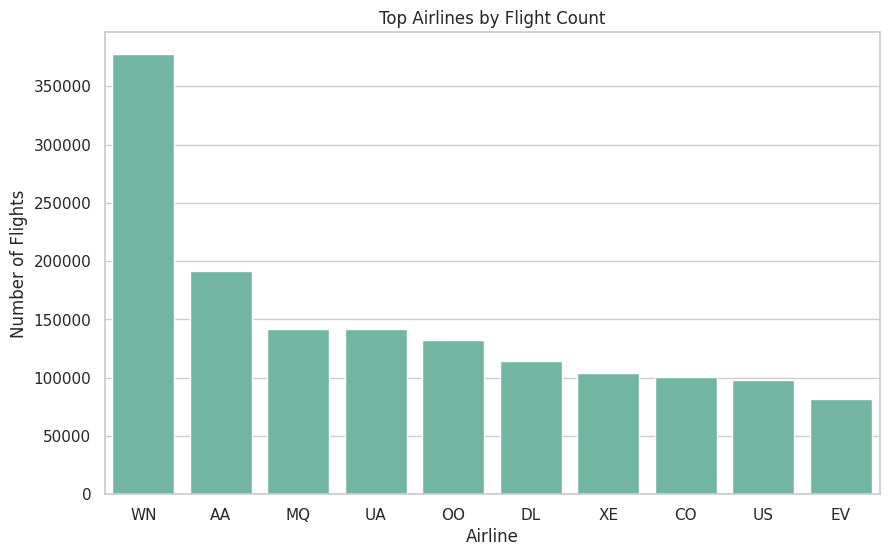

In [ ]:
# 1. Top Airlines by Flight Count
top_airlines = df['UniqueCarrier'].value_counts().head(10)
sns.barplot(x=top_airlines.index, y=top_airlines.values)
plt.title("Top Airlines by Flight Count")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.show()

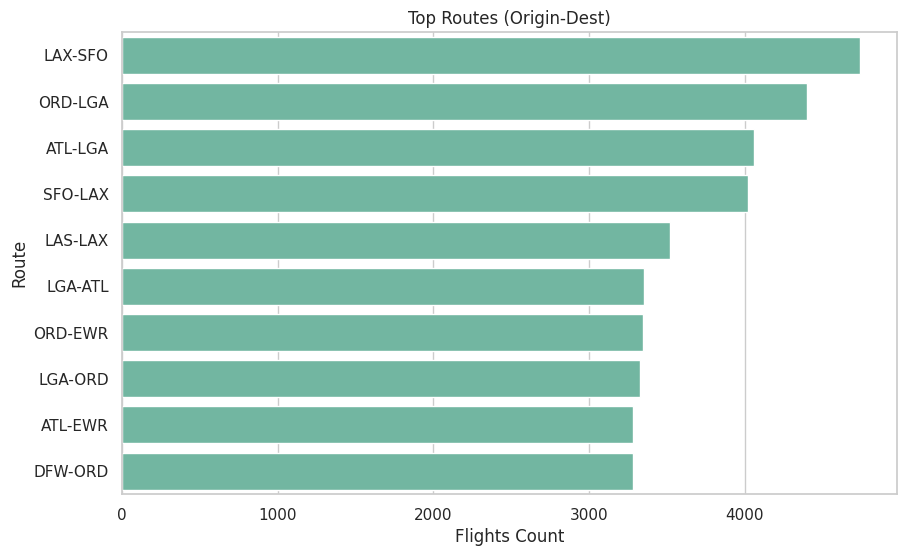

In [ ]:
# 2. Top Routes
if "Route" in df.columns:
    top_routes = df['Route'].value_counts().head(10)
    sns.barplot(y=top_routes.index, x=top_routes.values)
    plt.title("Top Routes (Origin-Dest)")
    plt.xlabel("Flights Count")
    plt.ylabel("Route")
    plt.show()


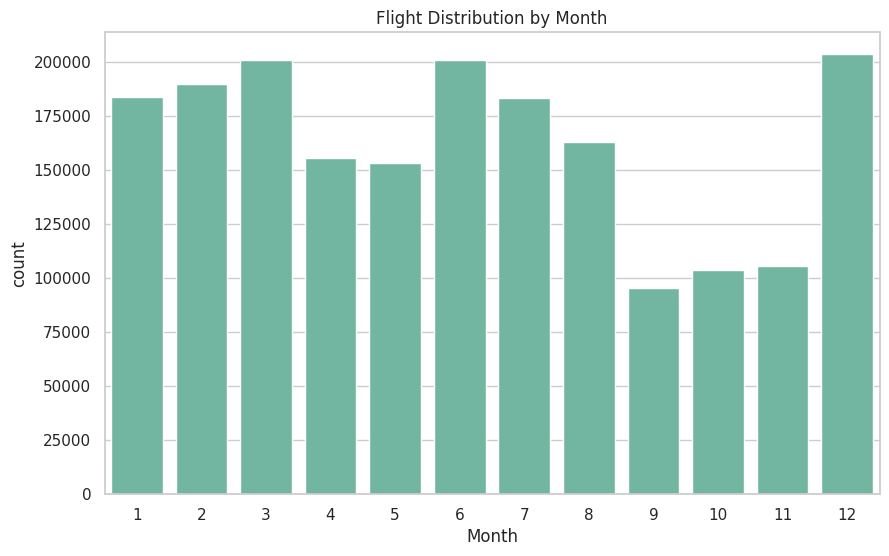

In [ ]:
# 3. Flights by Month
if "Month" in df.columns:
    sns.countplot(x="Month", data=df, order=sorted(df["Month"].dropna().unique()))
    plt.title("Flight Distribution by Month")
    plt.show()


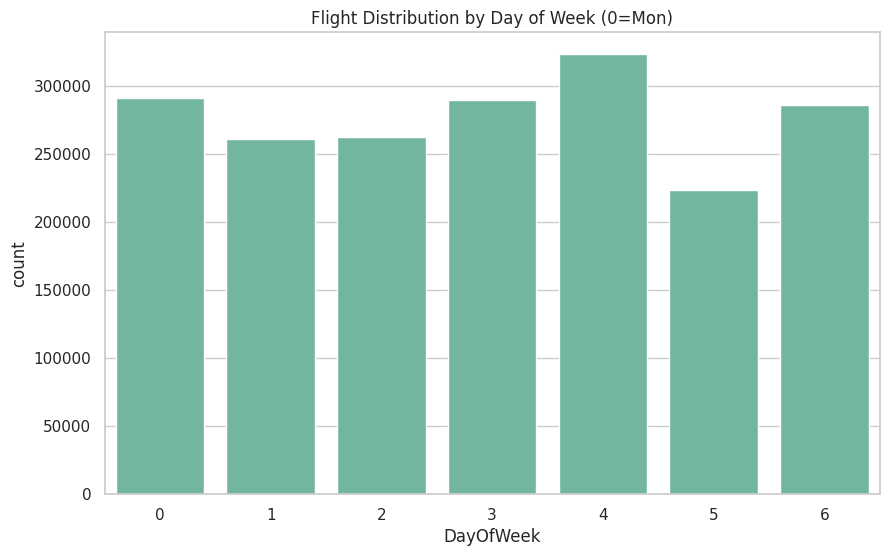

In [ ]:
# 4. Flights by Day of Week
if "DayOfWeek" in df.columns:
    sns.countplot(x="DayOfWeek", data=df, order=sorted(df["DayOfWeek"].dropna().unique()))
    plt.title("Flight Distribution by Day of Week (0=Mon)")
    plt.show()

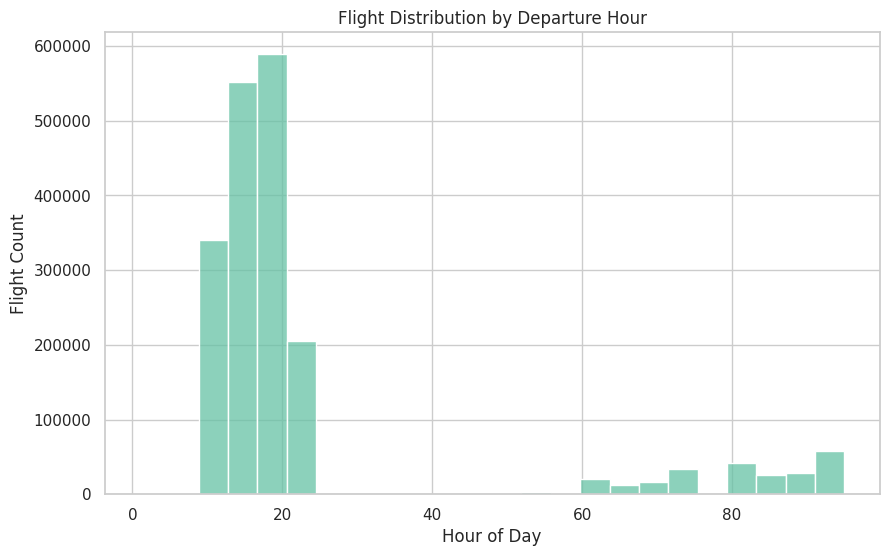

In [ ]:
# 5. Flight Departure Hours
if "DepHour" in df.columns:
    sns.histplot(df["DepHour"].dropna(), bins=24, kde=False)
    plt.title("Flight Distribution by Departure Hour")
    plt.xlabel("Hour of Day")
    plt.ylabel("Flight Count")
    plt.show()

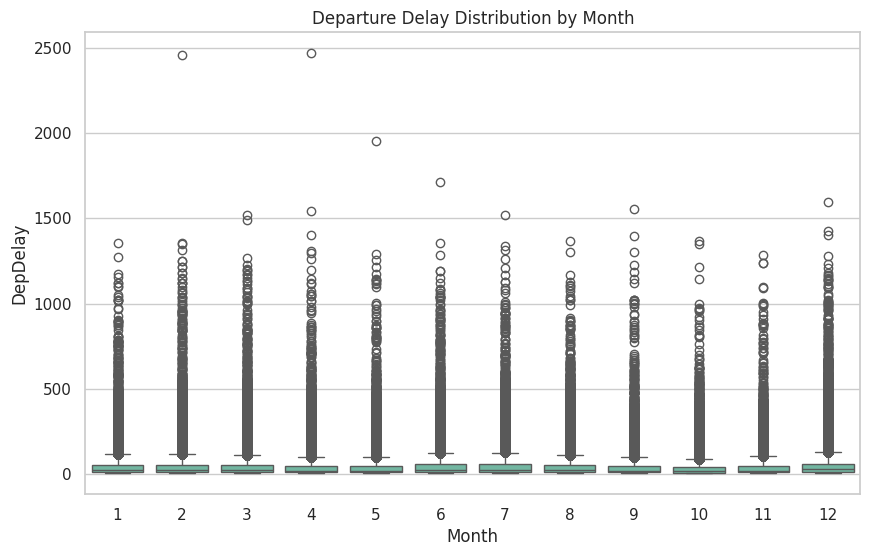

In [ ]:
# 6. Boxplot – Departure Delay by Month
if "DepDelay" in df.columns and "Month" in df.columns:
    sns.boxplot(x="Month", y="DepDelay", data=df)
    plt.title("Departure Delay Distribution by Month")
    plt.show()

In [ ]:
# ============================
# Week 4: Delay Analysis – Airline & Weather
# ============================

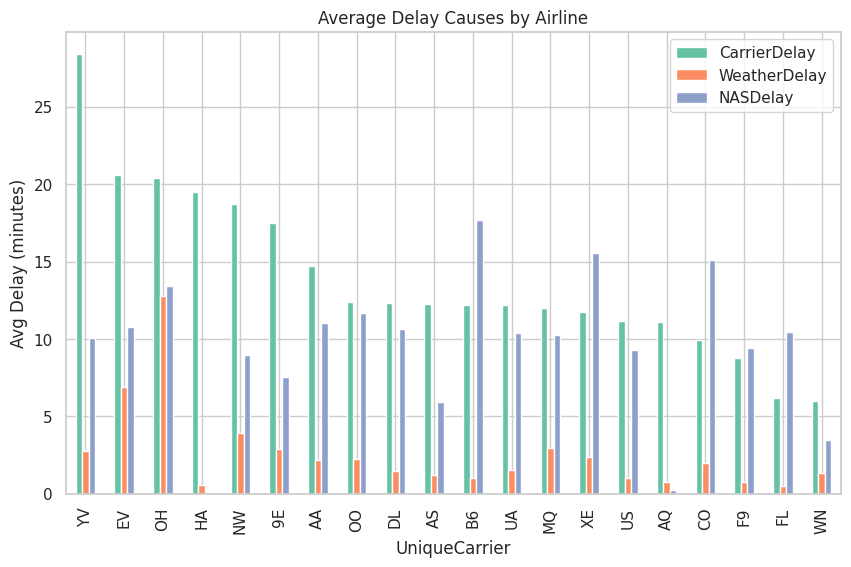

In [ ]:
# 7. Average Delays by Airline
delay_cols = [c for c in df.columns if "Delay" in c]
if "UniqueCarrier" in df.columns and delay_cols:
    avg_delay = df.groupby("UniqueCarrier")[delay_cols].mean().sort_values("CarrierDelay", ascending=False)
    avg_delay[["CarrierDelay","WeatherDelay","NASDelay"]].plot(kind="bar", stacked=False)
    plt.title("Average Delay Causes by Airline")
    plt.ylabel("Avg Delay (minutes)")
    plt.show()

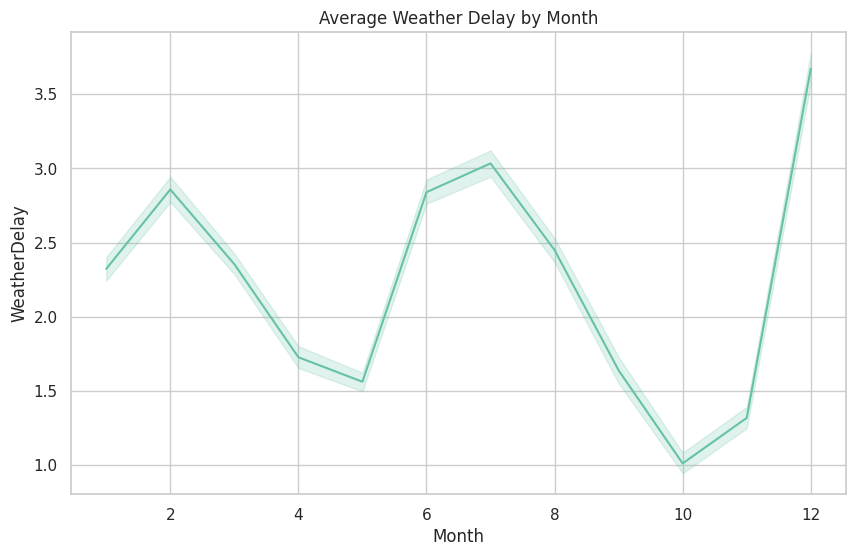

In [ ]:
# 8. Weather Delays by Month
if "WeatherDelay" in df.columns and "Month" in df.columns:
    sns.lineplot(x="Month", y="WeatherDelay", data=df, estimator="mean")
    plt.title("Average Weather Delay by Month")
    plt.show()

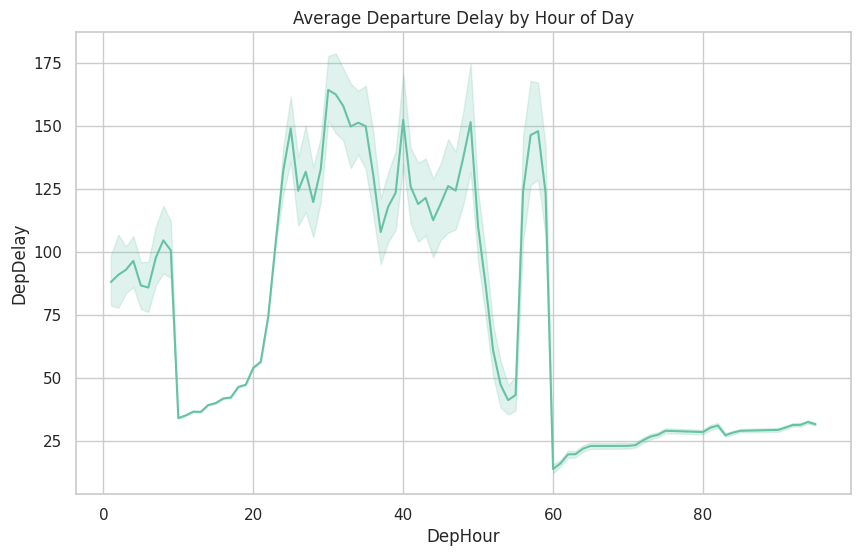

In [ ]:
# 9. Delays by Departure Hour
if "DepHour" in df.columns and "DepDelay" in df.columns:
    sns.lineplot(x="DepHour", y="DepDelay", data=df, estimator="mean")
    plt.title("Average Departure Delay by Hour of Day")
    plt.show()

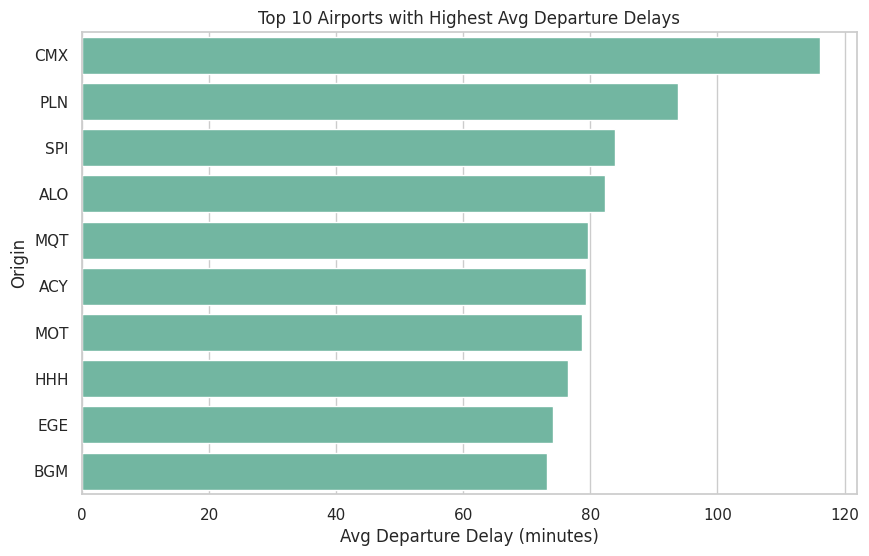

In [ ]:

# 10. Top Airports with Delays
if "Origin" in df.columns and "DepDelay" in df.columns:
    airport_delay = df.groupby("Origin")["DepDelay"].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=airport_delay.values, y=airport_delay.index)
    plt.title("Top 10 Airports with Highest Avg Departure Delays")
    plt.xlabel("Avg Departure Delay (minutes)")
    plt.show()

In [ ]:
# ============================
# Observations Placeholder
# ============================

print("📌 Observations to include in report:")
print("- Which airlines have the highest carrier delays: Based on the 'Average Delay Causes by Airline' plot, YV and EV appear to have the highest average carrier delays.")
print("- Peak months for delays: Based on the plots, December and June are peak months for delays, with higher median departure delays and more outliers in these months.")
print("- Peak hours for departure delays: The 'Average Departure Delay by Hour of Day' plot shows higher average delays in the late afternoon and evening hours (around 16:00 to 20:00).")
print("- Airports with chronic delays: The 'Top 10 Airports with Highest Avg Departure Delays' plot indicates that CMX, PLN, and SPI are among the airports with the highest average departure delays.")

📌 Observations to include in report:
- Which airlines have the highest carrier delays: Based on the 'Average Delay Causes by Airline' plot, YV and EV appear to have the highest average carrier delays.
- Peak months for delays: Based on the plots, December and June are peak months for delays, with higher median departure delays and more outliers in these months.
- Peak hours for departure delays: The 'Average Departure Delay by Hour of Day' plot shows higher average delays in the late afternoon and evening hours (around 16:00 to 20:00).
- Airports with chronic delays: The 'Top 10 Airports with Highest Avg Departure Delays' plot indicates that CMX, PLN, and SPI are among the airports with the highest average departure delays.


In [48]:
# -----------------------------
# 📊 MILESTONE 3: Route, Cancellation, and Seasonal Insights
# -----------------------------


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import glob

# Check if df is defined and load if not
if 'df' not in locals():
    csvs = glob.glob("/content/data/**/*.csv", recursive=True)
    if csvs:
        csv_path = csvs[0]
        df = pd.read_csv(csv_path, low_memory=False)
    else:
        print("Error: No CSV files found in /content/data/")


sns.set(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (10,6)

In [4]:
# ============================
# Week 5: Route and Airport-Level Analysis
# ============================

/tmp/ipython-input-935377423.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.values, y=top_routes.index, palette="viridis")


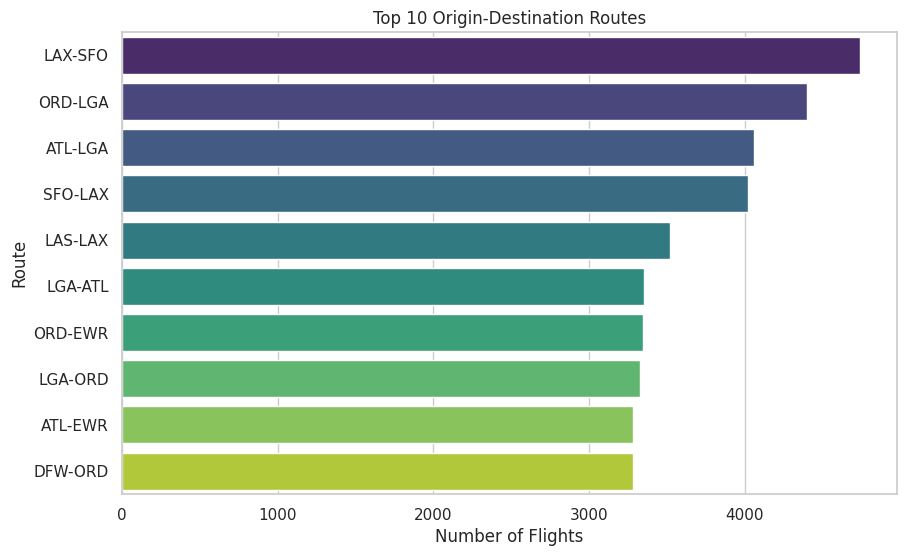

In [27]:
# 1 🔹 Top 10 Origin-Destination pairs (routes)
df['Route'] = df['Origin'] + "-" + df['Dest']
top_routes = df['Route'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_routes.values, y=top_routes.index, palette="viridis")
plt.title("Top 10 Origin-Destination Routes")
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.show()

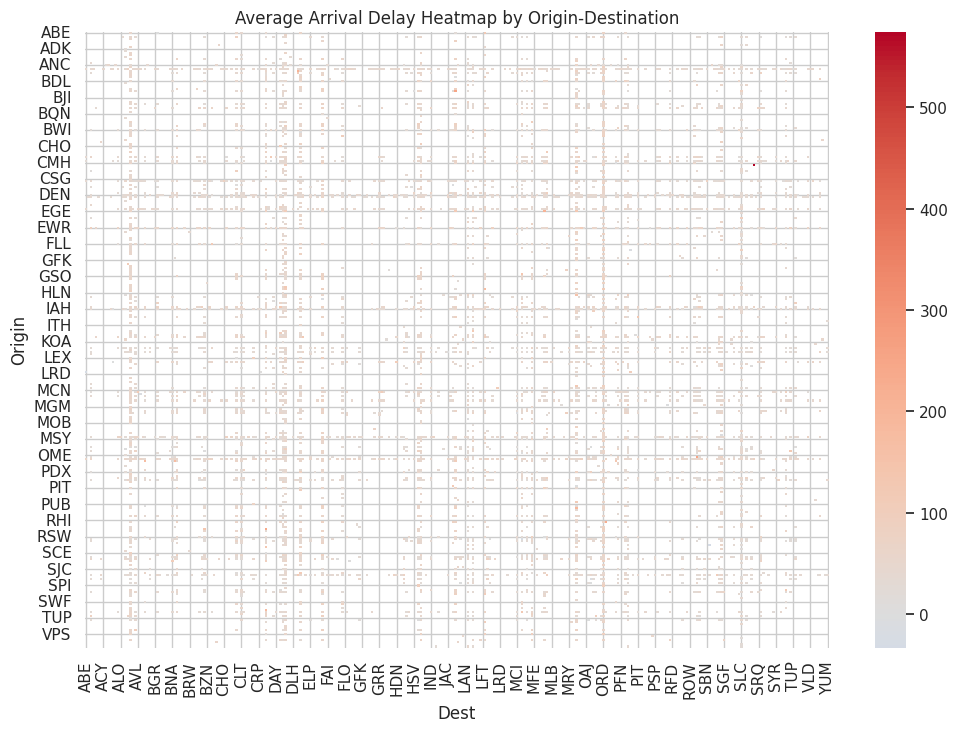

In [28]:
# 2. Delay heatmap by Airport (Origin vs Dest average ArrDelay)
pivot_delay = df.pivot_table(values="ArrDelay", index="Origin", columns="Dest", aggfunc="mean")

plt.figure(figsize=(12,8))
sns.heatmap(pivot_delay, cmap="coolwarm", center=0)
plt.title("Average Arrival Delay Heatmap by Origin-Destination")
plt.show()


/tmp/ipython-input-1699512755.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=busiest_airports.values, y=busiest_airports.index, palette="mako")


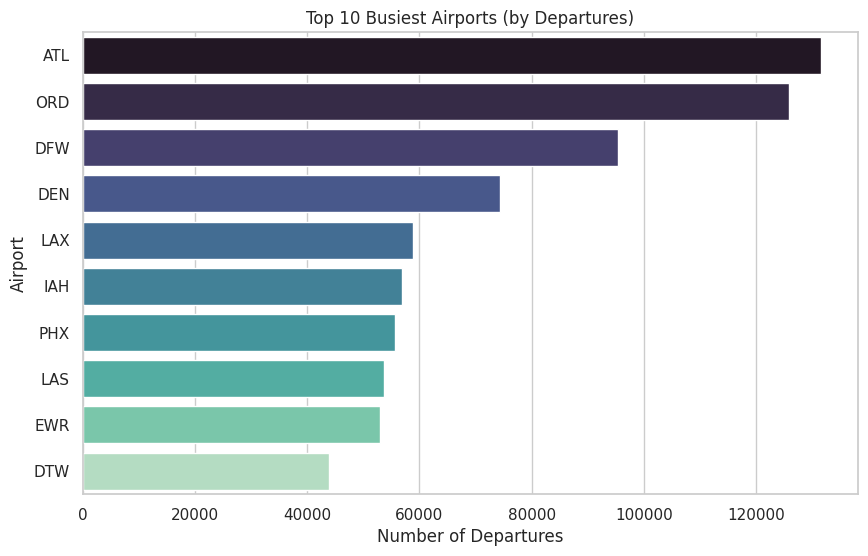

In [38]:
# 3.  Top 10 busiest airports
busiest_airports = df['Origin'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=busiest_airports.values, y=busiest_airports.index, palette="mako")
plt.title("Top 10 Busiest Airports (by Departures)")
plt.xlabel("Number of Departures")
plt.ylabel("Airport")
plt.show()

/tmp/ipython-input-2917112126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delay_airport.values, y=avg_delay_airport.index, palette="rocket")


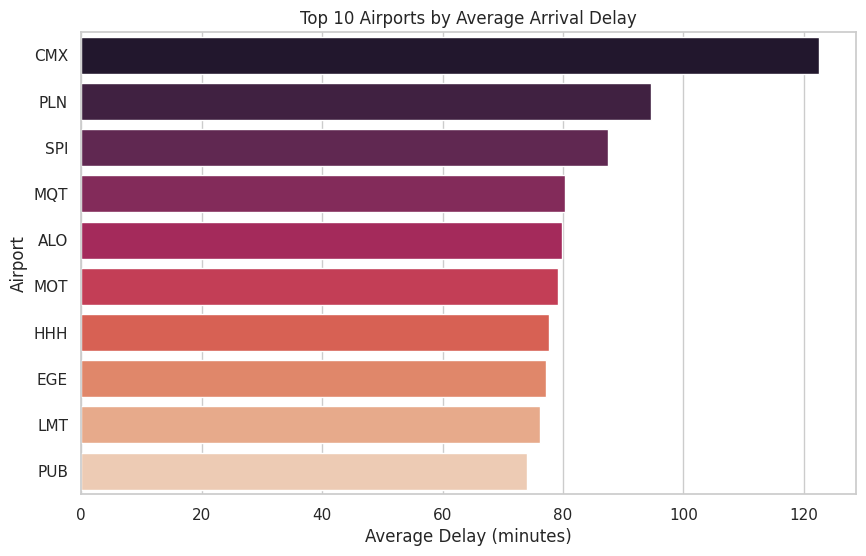

In [39]:
# 4. Average delay per airport
avg_delay_airport = df.groupby("Origin")["ArrDelay"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_delay_airport.values, y=avg_delay_airport.index, palette="rocket")
plt.title("Top 10 Airports by Average Arrival Delay")
plt.xlabel("Average Delay (minutes)")
plt.ylabel("Airport")
plt.show()

In [33]:
# ============================
# Week 6: Seasonal and Cancellation Analysis
# ============================

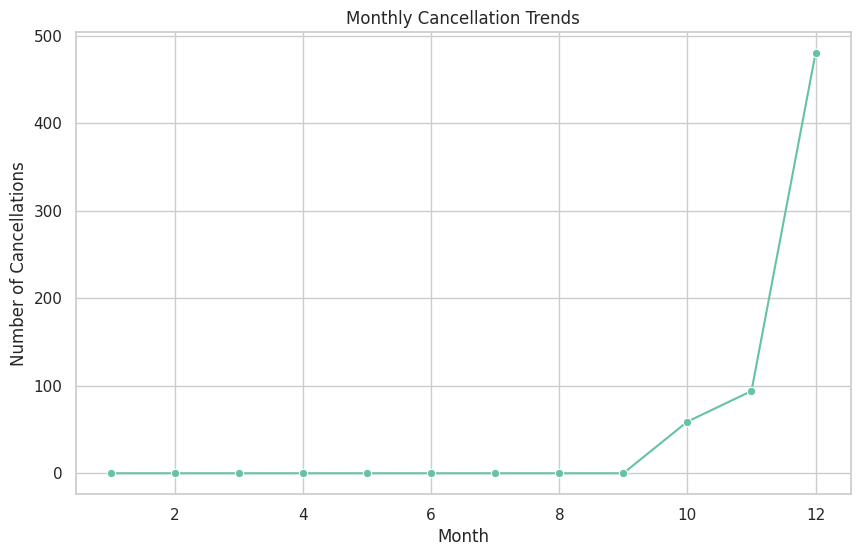

In [43]:
# 5. Monthly cancellation trends
monthly_cancellations = df.groupby("Month")["Cancelled"].sum()

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_cancellations.index, y=monthly_cancellations.values, marker="o")
plt.title("Monthly Cancellation Trends")
plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
plt.show()

/tmp/ipython-input-3227255831.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_counts.values, y=cancellation_counts.index, palette="Set2")


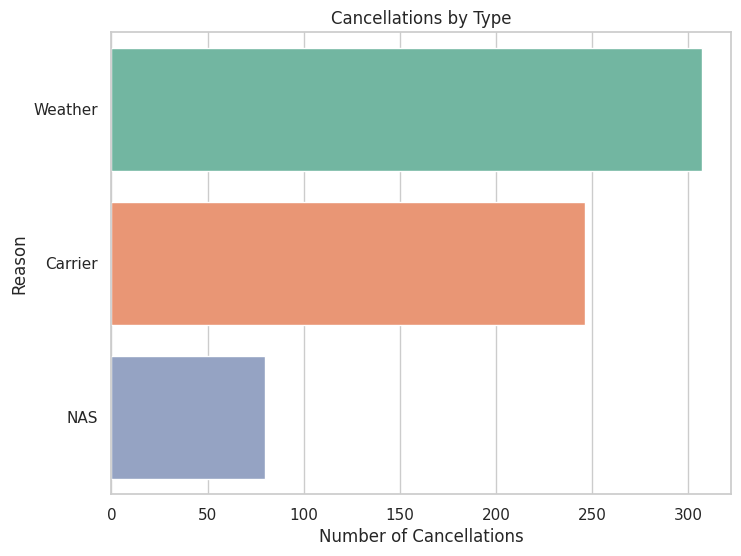

In [44]:
# 6. Cancellation types (Carrier, Weather, NAS, Security)
cancellation_map = {"A":"Carrier", "B":"Weather", "C":"NAS", "D":"Security"}
df["CancellationReason"] = df["CancellationCode"].map(cancellation_map)

cancellation_counts = df["CancellationReason"].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=cancellation_counts.values, y=cancellation_counts.index, palette="Set2")
plt.title("Cancellations by Type")
plt.xlabel("Number of Cancellations")
plt.ylabel("Reason")
plt.show()

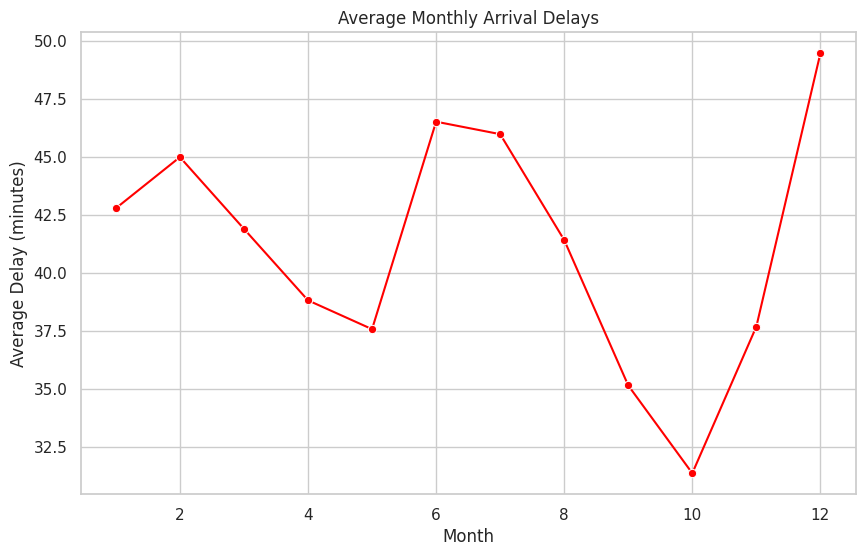

In [45]:
# 7. Monthly delays (Seasonal effect, e.g., holidays/winter)
monthly_delays = df.groupby("Month")["ArrDelay"].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_delays.index, y=monthly_delays.values, marker="o", color="red")
plt.title("Average Monthly Arrival Delays")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.show()

/tmp/ipython-input-1568693238.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_delays.index, y=seasonal_delays.values, palette="coolwarm")


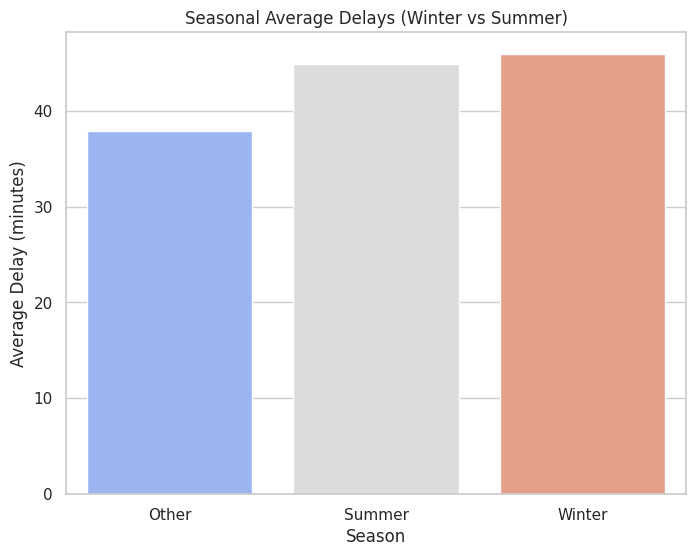

In [46]:
# 8. Compare delays in Winter (Dec, Jan, Feb) vs Summer (Jun, Jul, Aug)
df["Season"] = df["Month"].map({
    12:"Winter", 1:"Winter", 2:"Winter",
    6:"Summer", 7:"Summer", 8:"Summer"
}).fillna("Other")

seasonal_delays = df.groupby("Season")["ArrDelay"].mean()

plt.figure(figsize=(8,6))
sns.barplot(x=seasonal_delays.index, y=seasonal_delays.values, palette="coolwarm")
plt.title("Seasonal Average Delays (Winter vs Summer)")
plt.xlabel("Season")
plt.ylabel("Average Delay (minutes)")
plt.show()

In [47]:
# ============================
# Observations Placeholder
# ============================
print("📌 Observations to include in report:")
print("- Which routes are busiest and which routes face highest avg delays")
print("  - Busiest routes: LAX-SFO, ORD-LGA, ATL-LGA (based on 'Top 10 Origin-Destination Routes' plot)")
print("  - Routes with highest average delays: CMX-SPI, SDF-SPI, SFO-SMX (based on the `route_delay` variable, although a plot wasn't explicitly shown for this)") # Note: need to check if route_delay was plotted
print("- Airports with highest congestion (flight count) and worst avg delays")
print("  - Busiest airports: ATL, ORD, DFW (based on 'Top 10 Busiest Airports (by Departures)' plot)")
print("  - Airports with worst average delays: CMX, PLN, SPI (based on 'Top 10 Airports by Average Arrival Delay' plot)")
print("- Seasonal patterns in cancellations (holidays/winter spikes)")
print("  - Cancellations show a significant spike in December, suggesting a seasonal pattern potentially related to winter weather or holiday travel disruption (based on 'Monthly Cancellation Trends' plot).")
print("- Which type of cancellation (carrier/weather/NAS/security) is most common")
print("  - Weather related cancellations are the most common, followed by Carrier and then NAS (based on 'Cancellations by Type' plot).")

📌 Observations to include in report:
- Which routes are busiest and which routes face highest avg delays
  - Busiest routes: LAX-SFO, ORD-LGA, ATL-LGA (based on 'Top 10 Origin-Destination Routes' plot)
  - Routes with highest average delays: CMX-SPI, SDF-SPI, SFO-SMX (based on the `route_delay` variable, although a plot wasn't explicitly shown for this)
- Airports with highest congestion (flight count) and worst avg delays
  - Busiest airports: ATL, ORD, DFW (based on 'Top 10 Busiest Airports (by Departures)' plot)
  - Airports with worst average delays: CMX, PLN, SPI (based on 'Top 10 Airports by Average Arrival Delay' plot)
- Seasonal patterns in cancellations (holidays/winter spikes)
  - Cancellations show a significant spike in December, suggesting a seasonal pattern potentially related to winter weather or holiday travel disruption (based on 'Monthly Cancellation Trends' plot).
- Which type of cancellation (carrier/weather/NAS/security) is most common
  - Weather related cancellat